# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [1]:
# Paso 1: Cargar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset zoo ./zoo/zoo.data
zoo_data = pd.read_csv('./zoo/zoo.data', header=None)

# Asignar nombres a las columnas
zoo_data.columns = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
    'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
    'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'
]

# Resumen del dataset
print(zoo_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [2]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)

# Como todos los animales son unicos, excepto por 2 'frog', se puede realizar un one-hot encoding únicamente sobre el valor 'frog'
def one_hot_encode_frog(df):
    # Crear una nueva columna para 'frog'
    df['is_frog'] = np.where(df['animal_name'] == 'frog', 1, 0)
    
    # Eliminar la columna original 'animal_name'
    df = df.drop(columns=['animal_name'])
    
    return df

# Copiar el dataset original para no perder la información
zoo_data_encoded = zoo_data.copy()

# Aplicar el one-hot encoding
zoo_data_encoded = one_hot_encode_frog(zoo_data_encoded)


# Escalar normalizando los datos numéricos sin librerías adicionales
def normalize_data(df):
    # Normalizar solo columnas numéricas que no estén ya entre 0 y 1
    for column in df.columns:
        if column == 'type':
            continue
        if df[column].dtype in [np.int64, np.float64]:
            col_min = df[column].min()
            col_max = df[column].max()
            # Solo normalizar si los valores no están ya entre 0 y 1
            if not (col_min >= 0 and col_max <= 1):
                df[column] = (df[column] - col_min) / (col_max - col_min)
    return df

# Normalizar los datos
zoo_data_encoded = normalize_data(zoo_data_encoded)

# Visualizar el dataset preprocesado
print(zoo_data_encoded.head())


   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  is_frog  
0         1         0     0   0.5     0         0        1     1        0  
1         1         0     0   0.5     1         0        1     1        0  
2         0         0     1   0.0     1         0        0     4        0  
3         1         0     0   0.5     0         0        1     1        0  
4         1         0     0   0.5     1         0        1     1        0  


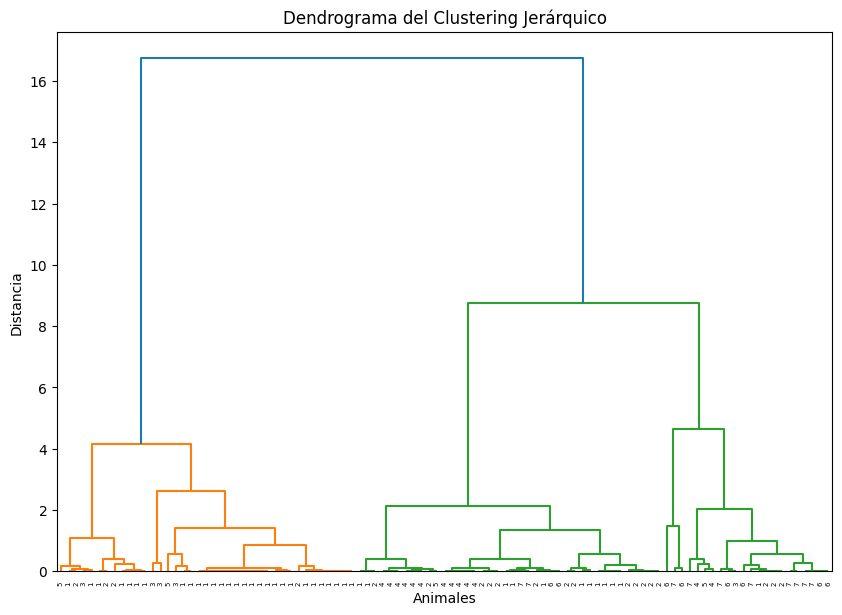

In [13]:
# Paso 3: Clustering Jerárquico

# Crear una matriz de distancias
def create_distance_matrix(df):
    # Calcular la matriz de distancias utilizando la distancia euclidiana
    return np.sqrt(((df - df.mean()) ** 2).sum(axis=1).values[:, None] + ((df - df.mean()) ** 2).sum(axis=1).values[None, :])

# Crear la matriz de distancias para el dataset preprocesado
distance_matrix = create_distance_matrix(zoo_data_encoded.drop(columns=['type']))

# Crear un DataFrame de distancias
distance_df = pd.DataFrame(distance_matrix, index=zoo_data_encoded.index, columns=zoo_data_encoded.index)


from scipy.cluster.hierarchy import linkage, dendrogram

# Realizar el clustering jerárquico (con el método de Ward)
linked = linkage(distance_df, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=zoo_data_encoded['type'].values, leaf_rotation=90)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Animales')
plt.ylabel('Distancia')
plt.show()


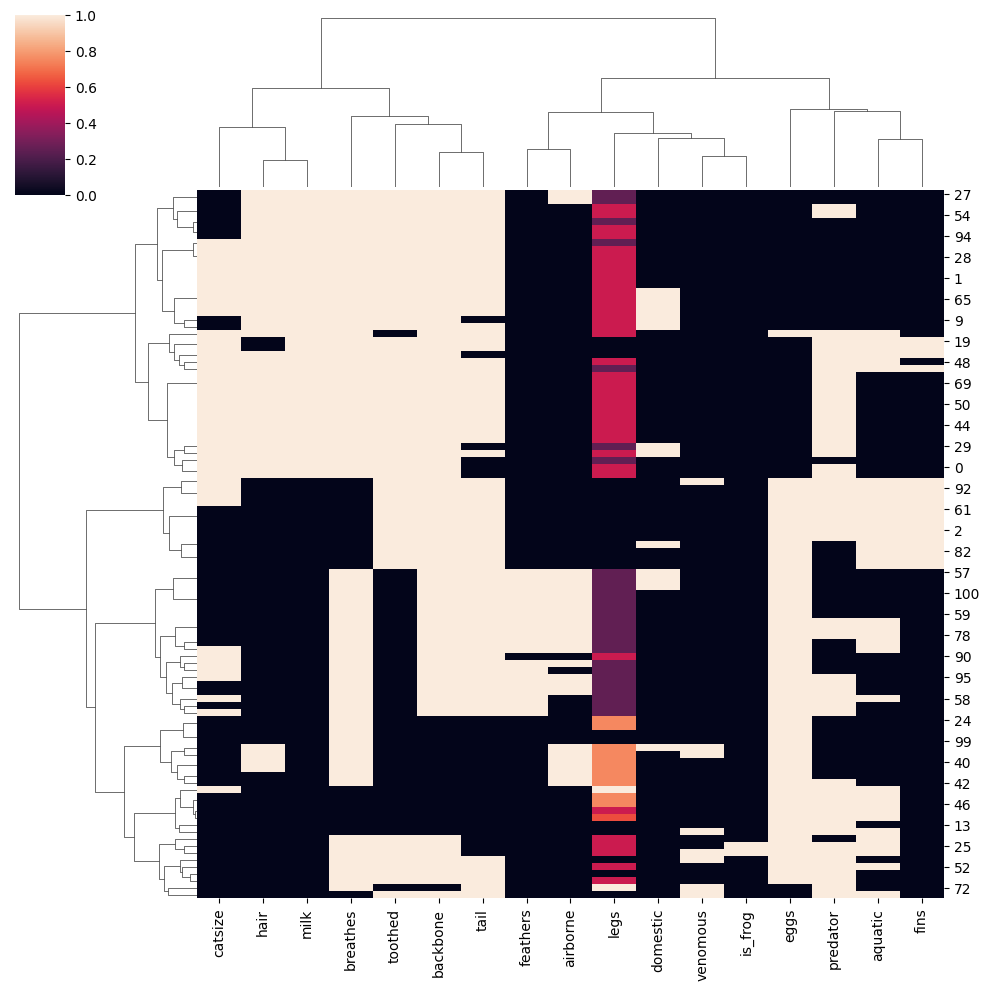

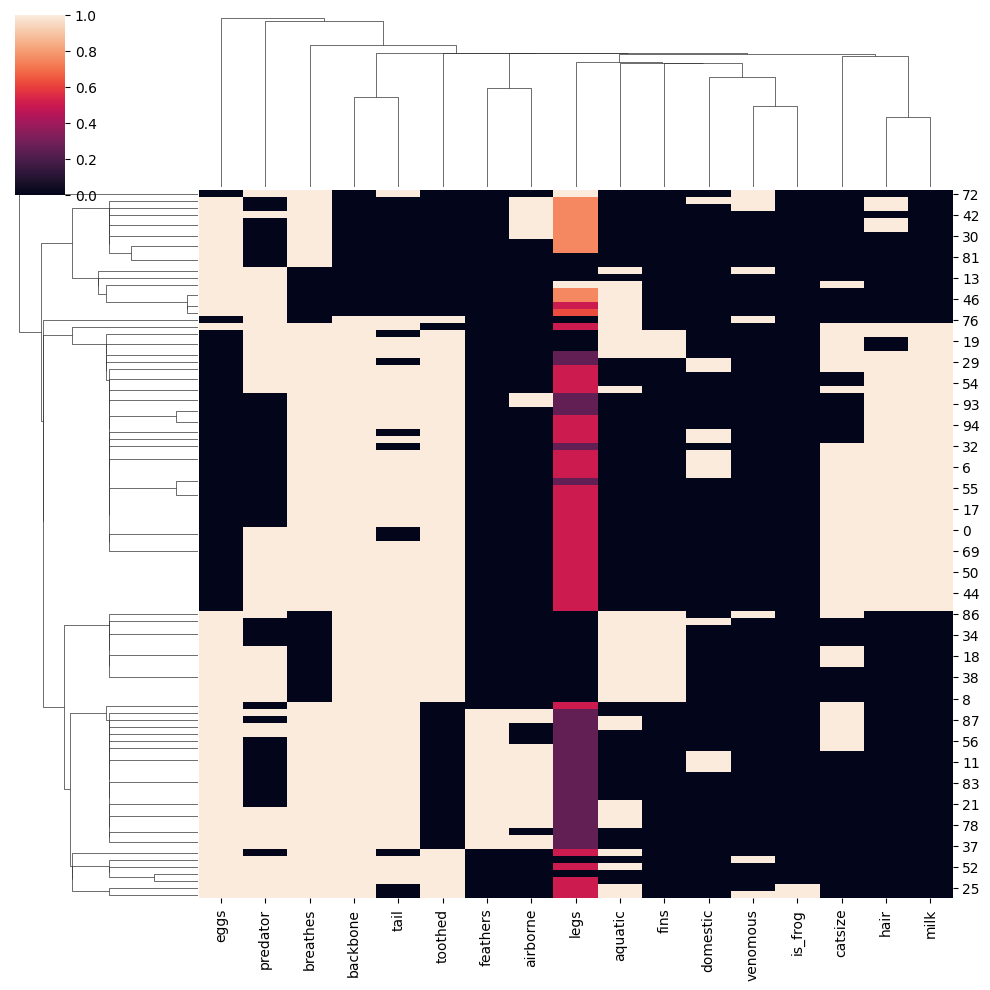

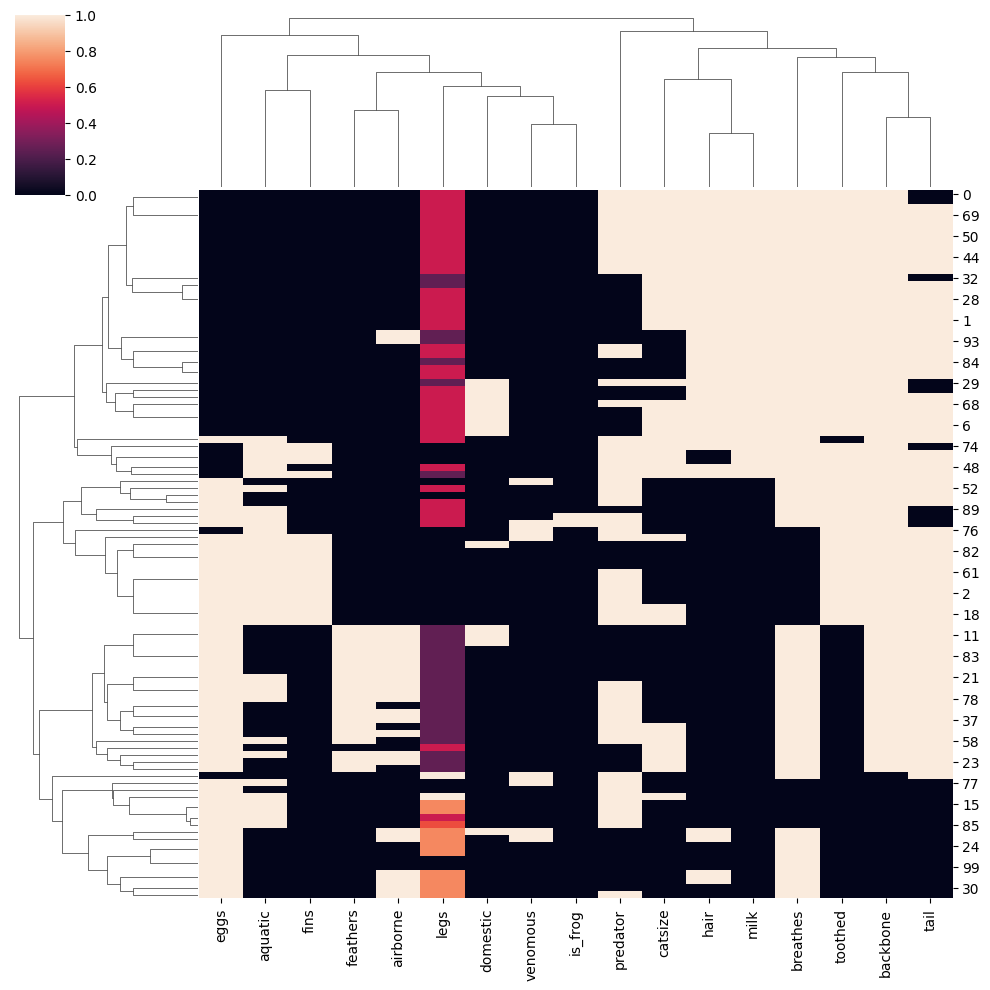

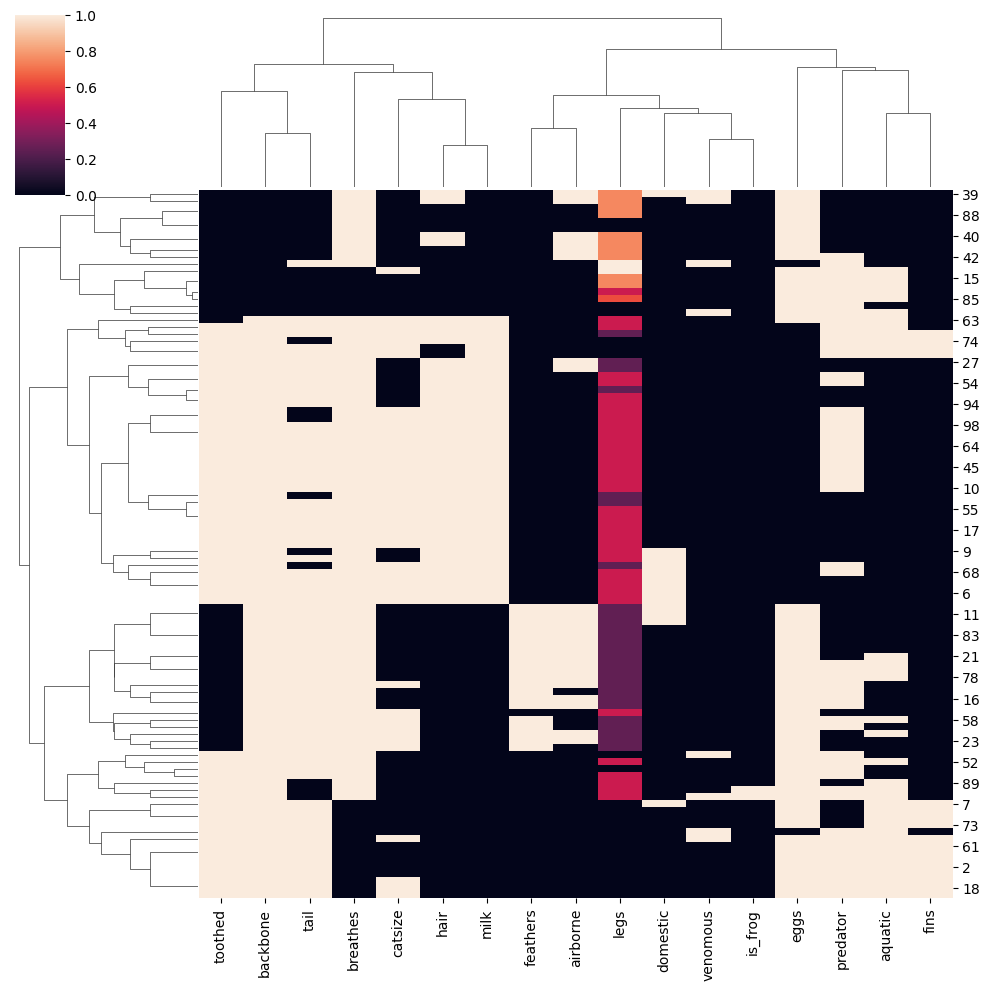

In [14]:
# Paso 4: Heatmap

# Crear dataframe de los datos para el clustermap
df = zoo_data_encoded.drop(columns=['type'])

# Linkage: Ward
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward")
plt.show()

# Linkage: Mínimo
sns.clustermap(df, metric="euclidean", standard_scale=1, method="single")
plt.show()

# Linkage: Promedio
sns.clustermap(df, metric="euclidean", standard_scale=1, method="average")
plt.show()

# Linkage: Máximo
sns.clustermap(df, metric="euclidean", standard_scale=1, method="complete")
plt.show()


# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

- Con Ward es fácil ver 3, pero depende de en qué nivel se realice el corte en el dendrograma, y qué método se use para el linkage.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

- backbone parece tener alta influencia en 3 de los 4 métodos probados, pero la presencia de todos los atributos influye en la creación.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

- De cierta manera sí, porque se ven bastante repetidos animales del mismo tipo en mismos clusters del dendrograma, pero no es perfecto.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

- Permite agrupar los animales en base a su cantidad de patas, principalmente.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

- Ward porque es estándar para crear grupos con tamaños similares, pero probé los otros métodos también para ver cómo variaban los resultados.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

- Se puede usar k-means con k = n-type si se desea intentar que el algoritmo clasifique los animales en su correcto tipo o DBSCAN si se desean encontrar agrupaciones de animales no previamente conocidas sobre los datos.